<a href="https://colab.research.google.com/github/santosh2994/AAIC/blob/master/MNIST_Fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the required packages

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

tf.__version__

'1.14.0'

In [2]:
fashion = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape
test_images.shape
len(train_labels)
len(test_labels)

10000

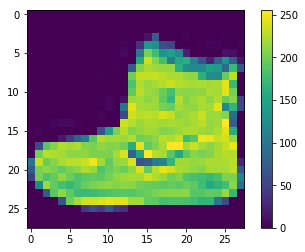

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.colorbar()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

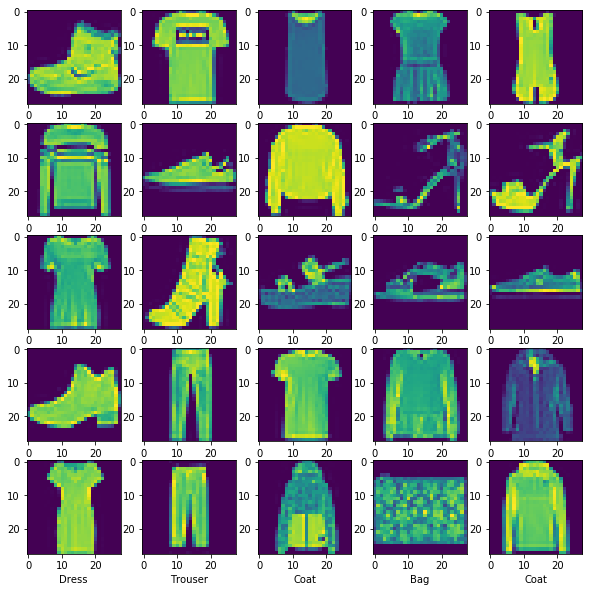

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks()
  plt.yticks()
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


W0725 17:08:47.067959 140687182583680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2296 - acc: 0.9129
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2236 - acc: 0.9152
Epoch 3/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2150 - acc: 0.9195
Epoch 4/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2101 - acc: 0.9222
Epoch 5/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2035 - acc: 0.9246
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1984 - acc: 0.9263
Epoch 7/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1933 - acc: 0.9273
Epoch 8/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1882 - acc: 0.9291
Epoch 9/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1837 - acc: 0.9327
Epoch 10/20
60000/60000 [==============================] - 4s 63us/sample - loss: 

##Evaluating the Accuracy


In [15]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('test_accuracy : ',test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.3945 - acc: 0.8901
test_accuracy :  0.8901


In [16]:
predictions = model.predict(test_images)
predictions[0]

array([1.7397144e-12, 2.1780795e-18, 1.5584054e-12, 1.2350828e-16,
       8.1416336e-16, 2.4508971e-03, 7.9482054e-10, 1.8222757e-02,
       3.9803286e-10, 9.7932637e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

###clearly from the above our neural network model worked well

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, prediction_array,true_label):
  prediction_array,true_label = prediction_array[i],true_label[i]
  plt.grid(False)
  plt.xticks()
  plt.yticks()
  thisplot = plt.bar(range(10), prediction_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

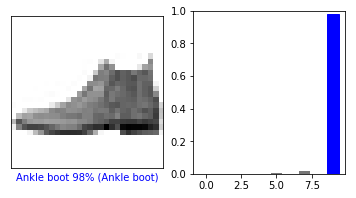

In [23]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)

plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

plt.show()

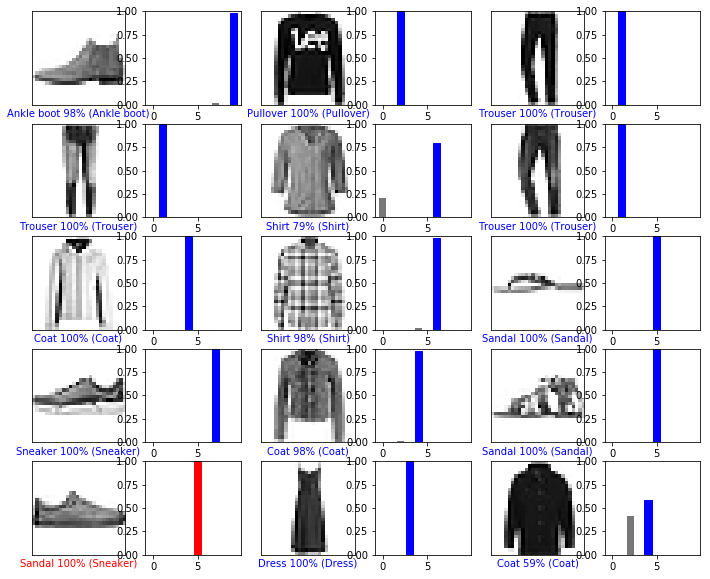

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()